In [1]:
%load_ext autoreload
%autoreload 2
from ProfileBuilder import Graphlet

from CustomRWKernel import compute_random_walk_kernel
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from networkx.drawing.nx_pylab import draw_kamada_kawai, draw_spring
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import networkx as nx
import numpy as np
import pygraphviz

from grakel.utils import graph_from_networkx
from grakel.kernels import RandomWalkLabeled
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

/home/chaps/.pyenv/versions/3.7.5/envs/venv375/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/chaps/.pyenv/versions/3.7.5/envs/venv375/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/chaps/.pyenv/versions/3.7.5/envs/venv375/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn

In [2]:
graphlet = Graphlet('data/annotated-trace.csv')

In [3]:
X = graphlet.profile_graphlets
y = graphlet.get_graphlets_label()
y =[0 if el=='normal' else 1 for el in y]

In [4]:
act = graphlet.activity_graphlets

In [5]:
a_nodes = 0
a_edges = 0
p_nodes = 0
p_edges = 0
for a, p, i in zip(graphlet.activity_graphlets, graphlet.profile_graphlets, range(len(graphlet.activity_graphlets))):
    a_nodes += len(a.nodes)
    a_edges += len(a.edges)
    p_nodes += len(p.nodes)
    p_edges += len(p.edges)
    

In [6]:
print("Total activity nodes", a_nodes)
print("Total activity edges", a_edges) 
print("Total activity nodes",p_nodes) 
print("Total activity edges",p_edges) 

Total activity nodes 35418
Total activity edges 42362
Total activity nodes 31416
Total activity edges 38360


In [7]:
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
A = to_agraph(X[3])
A.layout('dot')
A.draw('prof.png')

In [8]:
A = to_agraph(act[3])
A.layout('dot')
A.draw('act.png')

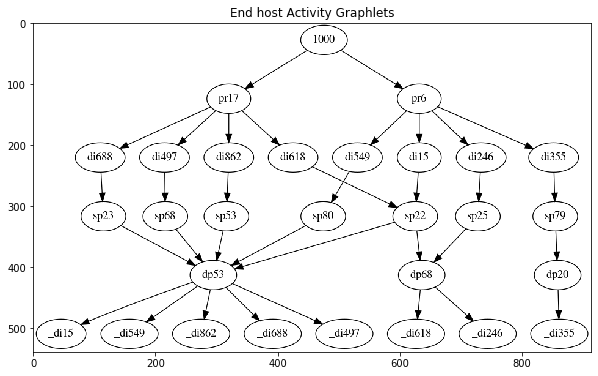

In [9]:
img = plt.imread('act.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('End host Activity Graphlets')
plt.show()

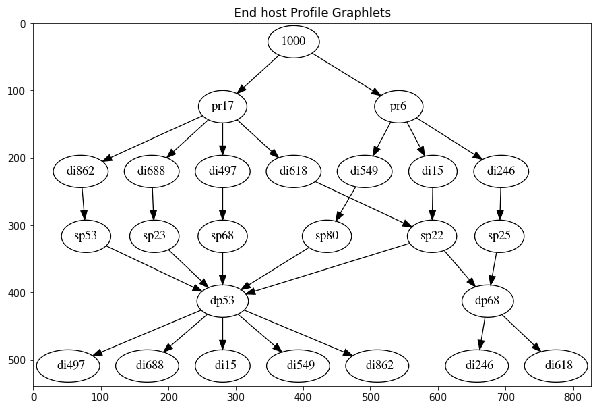

In [10]:
img = plt.imread('prof.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.title('End host Profile Graphlets')
plt.show()

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[[0, 1]]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




In [12]:
import pickle
import joblib
K_test = pickle.load( open( "k_test.p", "rb" ) )
K_train = pickle.load( open( "k_train.p", "rb" ) )
K_val =pickle.load( open( "k_val.p", "rb" ) )

model = joblib.load('svm_rand_walk1.joblib') 

In [32]:

y_pred = model.predict(K_train)
y = list(map(int, y))
y_pred = list(map(int, y_pred))

In [33]:
confusion_matrix(y, y_pred)

array([[942,   1],
       [ 57,   1]])

Confusion matrix, without normalization
[[942   1]
 [ 57   1]]


<Figure size 1080x720 with 0 Axes>

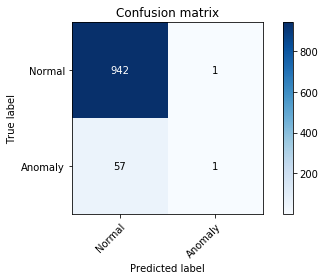

In [34]:
np.set_printoptions(precision=2)

plt.figure(figsize=(15,10))
# Plot non-normalized confusion matrix
plot_confusion_matrix(y, y_pred, classes=["Normal", "Anomaly"],
                      title='Confusion matrix')
plt.show()

In [35]:
y_pred = model.predict(K_test)
y_pred = list(map(int, y_pred))

In [39]:
graphlet = Graphlet('data/not-annotated-trace.csv', test=True)
X = graphlet.profile_graphlets

In [43]:
indices = [i for i, x in enumerate(y_pred) if x == 1]

In [45]:
for i in indices:
    A = to_agraph(X[i])
    A.layout('dot')
    A.draw('prof{}.png'.format(i))

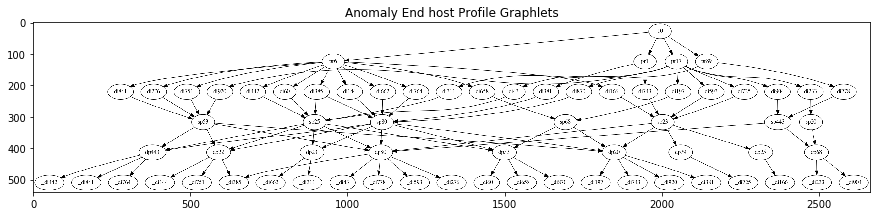

In [47]:
img = plt.imread('prof1.png')
plt.figure(figsize=(15,20))
plt.imshow(img)
plt.title('Anomaly End host Profile Graphlets')
plt.show()

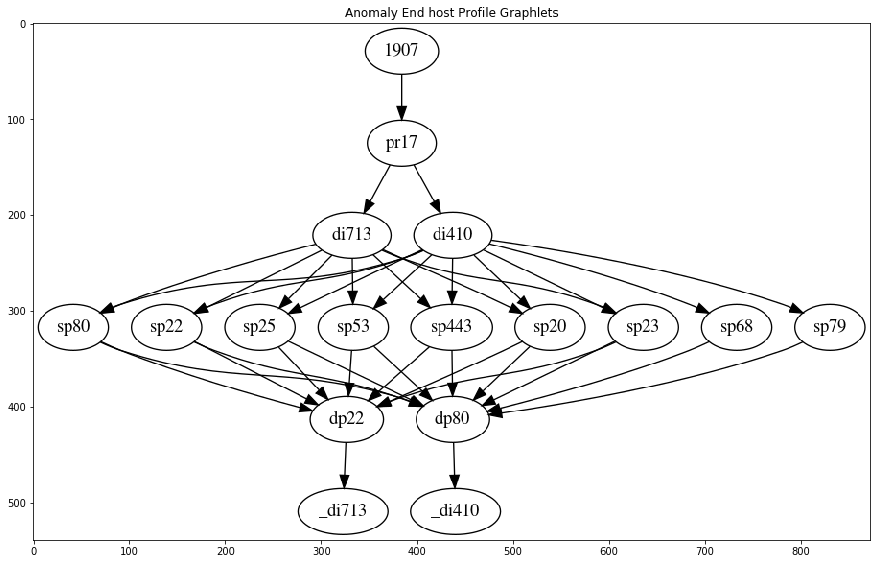

In [48]:
img = plt.imread('prof103.png')
plt.figure(figsize=(15,20))
plt.imshow(img)
plt.title('Anomaly End host Profile Graphlets')
plt.show()